# Capstone Project - The Battle of the Neighborhoods (Week 2)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction : Business Problem<a name="introduction"></a>

In this project we try to find a city in USA to set up an **import business** to sell fresh **Asian raw food** materials intended for restaurant use. 

Since there are a lot of cities in the states, we try to find the ones where we can get most of the business with the presence of Asian restaurants. We are also interested in finding what type of Asian restaurant do Americans usually prefer, Chinese, Japanese, Vietnamese, etc.

We will use data science to generate a the most promising city based on these criteria.  
 

# Data<a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* Total population and density in American cities
* Total number of  Asian restaurants in each of the cities
* Type of restaurant


Following data sources will be needed to extract/generate the required information:
* List of states, neighbourhoods in USA: https://simplemaps.com/data/us-zips
*  **Foursquare API** that provides location data for venues in a given neighbourhood: https://developer.foursquare.com/


# Methodology<a name="methodology"></a>

In the first step we extract information from a csv file containing data for all the counties, cities and states and select relevant columns to create a data frame of the fields we are interested in namely the state, city and their population and density. Pre-processing, grouping and sorting the data frame gives us the names of the cities we need.

In the second step, we use foursquare api to get venue data containing neighborhood, venue name, category and coordinates for each city and then filter out the on the Asian restaurant category.

Thirdly we check which city have the largest number of restaurants and the type. And cluster the restaurants based on neighborhood using machine learning technique , K-Means. 


## First we find out the top ten most populous and dense cities

### Importing Necessary Libraries

In [199]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans 

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import math

#print('Libraries imported.')## Import necessary libraries

In [200]:
# install wordcloud
#! pip3 install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

#print ('Wordcloud is installed and imported!')

In [3]:
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import matplotlib.pyplot as plt

In [5]:
import csv
import seaborn as sns

# Download and Explore Dataset 


In [6]:
#read csv file to get population and density values of all cities and countines 
df_data_1 = pd.read_csv(r'C:\Users\PSharan\Downloads\simplemaps_uszips_basicv1.77\uszips.csv')
df_data_1.head()


zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18005 -66.75218   Adjuntas       PR  Puerto Rico  True   
1  602  18.36074 -67.17519     Aguada       PR  Puerto Rico  True   
2  603  18.45440 -67.12201  Aguadilla       PR  Puerto Rico  True   
3  606  18.16721 -66.93828    Maricao       PR  Puerto Rico  True   
4  610  18.29032 -67.12244     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     17113.0    102.7        72001    Adjuntas   
1          NaN     37751.0    476.0        72003      Aguada   
2          NaN     47081.0    574.9        72005   Aguadilla   
3          NaN      6392.0     58.3        72093     Maricao   
4          NaN     26686.0    286.9        72011      Añasco   

                                      county_weights  \
0                {"72001": "99.43", "72141": "0.57"}   
1                                   {"72003": "100"}   
2                                   {"72005": "100"}   
3  {"72093": "94.88", "72153": "3.78", "72121": "...   
4                {"72011": "99.45", "72003": "0.55"}   

              county_names_all    county_fips_all  imprecise  military  \
0              Adjuntas|Utuado        72001|72141      False     False   
1                       Aguada              72003      False     False   
2                    Aguadilla              72005      False     False   
3  Maricao|Yauco|Sabana Grande  72093|72153|72121      False     False   
4                Añasco|Aguada        72011|72003      False     False   

              timezone  
0  America/Puerto_Rico  
1  America/Puerto_Rico  
2  America/Puerto_Rico  
3  America/Puerto_Rico  
4  America/Puerto_Rico

In [201]:
#Creating New Dataframe with Relevant Features
city_df = df_data_1[['state_name','city','county_name','population','density','lat','lng']]

#Renaming Columns
city_df.rename(columns = {'county_name':'County','city':'City','state_name':'State','population':'Population','density':'Density','lat':'Latitude','lng':'Longitude'}, inplace = True)

C:\Users\PSharan\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### List of states and total number of cities in each state

In [11]:
x=city_df[['State','City']].groupby('State').count()

In [12]:
x.sort_values(by='City', ascending=False)

City
State                         
Texas                     1935
Pennsylvania              1795
New York                  1794
California                1761
Illinois                  1383
Ohio                      1195
Missouri                  1022
Michigan                   986
Florida                    981
Iowa                       934
Virginia                   896
Minnesota                  884
North Carolina             808
Indiana                    775
Wisconsin                  772
Kentucky                   767
Georgia                    735
West Virginia              706
Kansas                     697
Oklahoma                   648
Alabama                    642
Tennessee                  628
Washington                 596
New Jersey                 595
Arkansas                   591
Nebraska                   581
Massachusetts              537
Colorado                   525
Louisiana                  515
Maryland                   468
Maine                      432
South Carolina             424
Mississippi                423
Oregon                     417
Arizona                    405
North Dakota               383
South Dakota               371
New Mexico                 368
Montana                    361
Utah                       287
Connecticut                282
Idaho                      277
Vermont                    255
New Hampshire              248
Alaska                     238
Wyoming                    178
Nevada                     175
Puerto Rico                131
Hawaii                      94
Rhode Island                77
Delaware                    67
District of Columbia        52
Virgin Islands              11
Guam                         9
Northern Mariana Islands     3
American Samoa               1

## Finding the top 10 most populous cities 

In [13]:
#Defining Average function
def average (num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(num)
    return avg

In [14]:
# Grouping by city and aggregating population in each city 
pop_city = city_df.groupby('City').agg({
                                        'Population': sum,
                                         'Density' : average,

                                                            } )

#Sorting Values in Descending order
pop_city = pop_city.sort_values(by='Population', ascending=False)

#Choosing the top 50 most populous cities
city_50 = pop_city.head(50)

### Further sorting by density

In [15]:
#Sorting Values in Descending order
city_10 = city_50.sort_values(by='Density', ascending=False)

#Displaying the top 10 most populous cities
city= city_10.head(12)

# Adding bronx and brooklyn's population to nyc
city.iloc[0,0]= city.iloc[0,0] + city.iloc[1,0]+city.iloc[2,0]

#Averaging the density of nyc, bronx and brooklyn
num = [city.iloc[0,1],city.iloc[1,1],city.iloc[2,1]]
city.iloc[0,1]= average(num)

#Dropping Bronx and Brooklyn
city= city.drop(labels= ['Bronx','Brooklyn'], axis=0) #Bronx and Brooklyn are a part of NYC

#resetting index of the dataframe
city=city.reset_index()
city

C:\Users\PSharan\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



City  Population       Density
0       New York   5712078.0  17308.259372
1  San Francisco    875107.0   8160.925000
2        Chicago   2692662.0   6328.833929
3    Los Angeles   2467874.0   5527.210769
4   Philadelphia   1611568.0   5032.803774
5        Seattle    971465.0   3800.418421
6          Miami   1893623.0   2740.550794
7       San Jose   1051795.0   2551.760000
8     Washington    939289.0   2434.268000
9      Milwaukee    809038.0   2311.468966

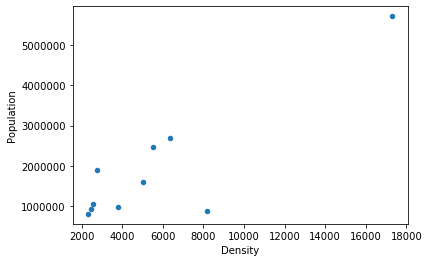

In [17]:
city.plot(kind='scatter',x='Density',y='Population')

## New York city has far more population and number of people living per square meter than any other city in america

In [202]:
# define the dataframe columns
column_names = ['State','City', 'County', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [203]:
list1= ['New York','San Francisco','Chicago','Los Angeles','Philadelphia','Seattle','Miami','San Jose','Washington','Milwaukee']
length=(len(city_df['State']))

In [204]:
for row in range(length):
          if city_df.loc[row,'City'] in list1:
            
            county = city_df.loc[row,'County']
            city = city_df.loc[row,'City']
            state = city_df.loc[row,'State']
            lat = city_df.loc[row,'Latitude']
            long = city_df.loc[row,'Longitude']

            neighborhoods = neighborhoods.append({'County': county ,
                                              'City': city,
                                              'State': state,
                                              'Latitude': lat,
                                              'Longitude': long }, ignore_index=True ) 
            

### Total number of counties in each city 

In [206]:
total_county =neighborhoods[['City','County']].groupby('City').count()
total_county.sort_values(by='County', ascending=False)

County
City                 
Washington         75
New York           69
Los Angeles        65
Miami              63
Chicago            56
Philadelphia       53
Seattle            38
San Jose           30
Milwaukee          29
San Francisco      28

In [208]:
print('Total Unique counties : {}'.format(len(neighborhoods['County'].unique())))

Total Unique counties : 43


In [209]:
city = neighborhoods.groupby(['City']) .agg(lambda x:x.value_counts().index[0]).reset_index()

In [211]:
# correcting coordinates for washington
add=city.iloc[9,0]

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude
    
#print(city.iloc[9,0])   

city.iloc[9,3]=latitude
city.iloc[9,4]=longitude

In [28]:
map_city = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(city['Latitude'], city['Longitude'], city['City']):
    label = folium.Popup(label, parse_html=True)
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False) .add_to(map_city)
            
# add pop-up text to each marker on the map
latitudes = list(city['Latitude'])
longitudes = list( city['Longitude'])
labels = list(city['City'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_city)


map_city

### Connecting to Foursquare and getting venue data

Now we have the name of the cities and their locations, so now we can proceed to get the venue data from foursquare api for each city coordinate.

Since the the credentials of the account is not for a premium one, there is a limit to how many venues can be called for each city, over here the limit is 900.

In [29]:
# @hidden_cell

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)/

In [30]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            #city,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [#'City'
                    'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

## Creating dataframe with venues from each city

In [33]:
venues = pd.DataFrame()

for i in range(10):
    
    #Getting coordinates from geopy for each city to use in foursquare
    address = city.iloc[i,0]

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate of {} are {}, {}.'.format(address,latitude, longitude))
    
    
    ##
    radius = 500 # define radius

    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT)
    #print(url)
    
    #getting a json file from the foursquare api
    results = requests.get(url).json()
    #results

    listo = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(listo) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues = nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
    
    #create multiple data frames here
    ven = getNearbyVenues(#address,
                                    names=nearby_venues['name'],
                                   latitudes=nearby_venues['lat'],
                                   longitudes=nearby_venues['lng']
                                  )
    #add new column city to ven
    ven.insert(0, "City", address, True)

    venues= pd.concat([venues, ven])


C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



Auditorium Theatre
Cafecito
Osaka Sushi Express & Fresh Fruit Smoothies
Dunkin'
Hostelling International Chicago
Fine Arts Building
Selected Works Used Books & Sheet Music
Room Escape Adventures - Trapped In A Room With A Zombie
SummerDance
Congress Plaza
Warehouse Liquors
Supercuts
Fontano's Pizza and Subs
The Blackstone Hotel
Harold's Chicken Shack
Buddy Guy's Legends
Chicago Architecture Foundation
Mercat a la Planxa
The South Garden
Luna Cafe Restaurant
Shamrock Shuffle Start Line & Corrals
Auditorium Building
Just Salad
Symphony Center (Chicago Symphony Orchestra)
North President's Court (Abraham Lincoln Statue)
Grant Park
The Art Institute of Chicago
Dollop Coffee & Tea
Hilton Chicago Athletic Club
720 South Bar & Grill
Grand Park
Badmaash
Redbird
Kinokuniya Bookstore
JiST Cafe
Fugetsu-Do Sweet Shop
Marukai Market
LA Plaza de Cultura y Artes
Birds & Bees
Blue Whale Bar
Mike's Deli
Marugame Monzo
Izakaya & Bar Fu-ga
Daikokuya
Rice & Nori
Mitsuru Sushi and Grill
Chinese American Mu

In [34]:
#del venues
#del ven
#del nearby_venues
venues.head()


City        Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Chicago  Auditorium Theatre              41.876058              -87.625303   
1  Chicago  Auditorium Theatre              41.876058              -87.625303   
2  Chicago  Auditorium Theatre              41.876058              -87.625303   
3  Chicago  Auditorium Theatre              41.876058              -87.625303   
4  Chicago  Auditorium Theatre              41.876058              -87.625303   

                                         Venue  Venue Latitude  \
0                           Auditorium Theatre       41.876058   
1                                     Cafecito       41.875724   
2  Osaka Sushi Express & Fresh Fruit Smoothies       41.876969   
3                                      Dunkin'       41.876814   
4                           Fine Arts Building       41.876511   

   Venue Longitude         Venue Category  
0       -87.625303                Theater  
1       -87.626386       Cuban Restaurant  
2       -87.624534       Sushi Restaurant  
3       -87.624658             Donut Shop  
4       -87.624234  General Entertainment

In [216]:
print ( '''Total number of cities: {} \nTotal number of neighbourhoods: {} \nTotal number of venues {}'''.format(len(pd.unique(venues['City'])),len(pd.unique(venues['Neighborhood'])),venues.shape[0]))       

Total number of cities: 10 
Total number of neighbourhoods: 287 
Total number of venues 8571


### Counting total number of venues for each city

In [38]:
count_venue=venues[['City','Venue']].groupby('City').count()

In [39]:
count_venue=count_venue.sort_values('Venue',ascending= False)
count_venue

Venue
City                
Chicago          900
New York         900
Philadelphia     900
San Francisco    900
San Jose         900
Seattle          900
Washington       896
Miami            880
Los Angeles      854
Milwaukee        541

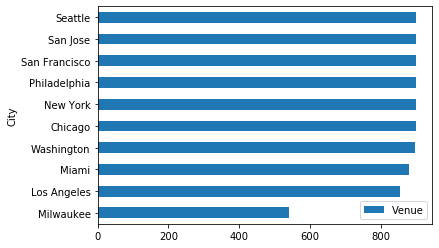

In [40]:
count_venue.sort_values('Venue').plot.barh()

## Venue Categories

In [41]:
print('There are {} uniques categories of venues.'.format(len(venues['Venue Category'].unique())))

There are 238 uniques categories of venues.


## One hot encoding

In [42]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add city and neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1]) # move neighborhood column to the first column
venues_onehot = venues_onehot[fixed_columns]

venues_onehot['City'] = venues['City']
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

City        Neighborhood  ATM  American Restaurant  Antique Shop  \
0  Chicago  Auditorium Theatre    0                    0             0   
1  Chicago  Auditorium Theatre    0                    0             0   
2  Chicago  Auditorium Theatre    0                    0             0   
3  Chicago  Auditorium Theatre    0                    0             0   
4  Chicago  Auditorium Theatre    0                    0             0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Automotive Shop  \
0                   0           0                      0                0   
1                   0           0                      0                0   
2                   0           0                      0                0   
3                   0           0                      0                0   
4                   0           0                      0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bar  Baseball Field  Beer Bar  \
0          0           0           0       0    0               0         0   
1          0           0           0       0    0               0         0   
2          0           0           0       0    0               0         0   
3          0           0           0       0    0               0         0   
4          0           0           0       0    0               0         0   

   Bistro  Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  \
0       0          0         0           0                     0   
1       0          0         0           0                     0   
2       0          0         0           0                     0   
3       0          0         0           0                     0   
4       0          0         0           0                     0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Building  Burger Joint  \
0               0        0                0         0             0   
1               0        0                0         0             0   
2               0        0                0         0             0   
3               0        0                0         0             0   
4               0        0                0         0             0   

   Burrito Place  Bus Station  Bus Stop  Butcher  Cafeteria  Café  \
0              0            0         0        0          0     0   
1              0            0         0        0          0     0   
2              0            0         0        0          0     0   
3              0            0         0        0          0     0   
4              0            0         0        0          0     0   

   Cajun / Creole Restaurant  Camera Store  Candy Store  Caribbean Restaurant  \
0                          0             0            0                     0   
1                          0             0            0                     0   
2                          0             0            0                     0   
3                          0             0            0                     0   
4                          0             0            0                     0   

   Cheese Shop  Chinese Restaurant  Chocolate Shop  Churrascaria  \
0            0                   0               0             0   
1            0                   0               0             0   
2            0                   0               0             0   
3            0                   0               0             0   
4            0                   0               0             0   

   Clothing Store  Cocktail Bar  Coffee Shop  College Basketb

# Grouping by cities

In [44]:
venues_grouped = venues_onehot.groupby('City').mean().reset_index()
venues_grouped

City       ATM  American Restaurant  Antique Shop  Art Gallery  \
0        Chicago  0.000000             0.008889      0.000000     0.012222   
1    Los Angeles  0.000000             0.017564      0.000000     0.017564   
2          Miami  0.000000             0.028409      0.000000     0.000000   
3      Milwaukee  0.003697             0.064695      0.000000     0.005545   
4       New York  0.000000             0.022222      0.022222     0.000000   
5   Philadelphia  0.000000             0.022222      0.000000     0.007778   
6  San Francisco  0.000000             0.000000      0.000000     0.000000   
7       San Jose  0.000000             0.000000      0.000000     0.033333   
8        Seattle  0.000000             0.005556      0.000000     0.000000   
9     Washington  0.000000             0.051339      0.000000     0.000000   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0    0.020000             0.025556          0.031111            0.000000   
1    0.002342             0.002342          0.000000            0.002342   
2    0.000000             0.000000          0.004545            0.000000   
3    0.005545             0.000000          0.000000            0.000000   
4    0.000000             0.000000          0.013333            0.000000   
5    0.008889             0.023333          0.014444            0.000000   
6    0.007778             0.000000          0.000000            0.000000   
7    0.002222             0.000000          0.004444            0.000000   
8    0.002222             0.000000          0.000000            0.000000   
9    0.015625             0.000000          0.000000            0.000000   

   Auditorium  Australian Restaurant  Automotive Shop  BBQ Joint  Baby Store  \
0    0.000000               0.000000         0.000000   0.001111    0.000000   
1    0.000000               0.000000         0.000000   0.007026    0.000000   
2    0.000000               0.000000         0.000000   0.000000    0.000000   
3    0.000000               0.000000         0.007394   0.022181    0.000000   
4    0.001111               0.001111         0.000000   0.000000    0.001111   
5    0.000000               0.000000         0.000000   0.000000    0.000000   
6    0.000000               0.000000         0.000000   0.000000    0.000000   
7    0.000000               0.000000         0.000000   0.003333    0.000000   
8    0.000000               0.000000         0.000000   0.025556    0.000000   
9    0.000000               0.000000         0.000000   0.000000    0.000000   

   Bagel Shop    Bakery       Bar  Baseball Field  Beer Bar    Bistro  \
0    0.000000  0.000000  0.005556        0.001111  0.000000  0.000000   
1    0.000000  0.031616  0.044496        0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000        0.000000  0.000000  0.022727   
3    0.003697  0.005545  0.003697        0.000000  0.000000  0.000000   
4    0.012222  0.034444  0.000000        0.000000  0.000000  0.000000   
5    0.000000  0.043333  0.016667        0.000000  0.000000  0.000000   
6    0.011111  0.011111  0.001111        0.000000  0.013333  0.000000   
7    0.000000  0.022222  0.045556        0.000000  0.023333  0.000000   
8    0.000000  0.001111  0.008889        0.000000  0.000000  0.000000   
9    0.000000  0.000000  0.041295        0.000000  0.000000  0.000000   

   Bookstore  Boutique  Boxing Gym  Brazilian Restaurant  Breakfast Spot  \
0   0.012222  0.004444        0.00              0.000000        0.000000   
1   0.026932  0.037471        0.00              0.000000        0.029274   
2   0.000000  0.000000        0.00              0.000000        0.023864   
3   0.000000  0.000000        0.00              0.000000        0.000000   
4   0.022222  0.000000        0.02              0.000000        0.002222   
5   0.000000  0.000000        0.00              0.000000        0.012222   
6   0.005556  0.027778        0.00              0.000000        0.000000   
7   0.000000  0.000000 

# Listing the most common type of venue

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = venues_grouped['City']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

City 1st Most Common Venue 2nd Most Common Venue  \
0        Chicago           Pizza Place           Coffee Shop   
1    Los Angeles      Sushi Restaurant   Japanese Restaurant   
2          Miami    Italian Restaurant   Peruvian Restaurant   
3      Milwaukee                 Hotel           Coffee Shop   
4       New York    Falafel Restaurant           Coffee Shop   
5   Philadelphia                 Hotel                Bakery   
6  San Francisco     French Restaurant          Cocktail Bar   
7       San Jose    Mexican Restaurant          Cocktail Bar   
8        Seattle          Cocktail Bar           Coffee Shop   
9     Washington                 Hotel           Coffee Shop   

           3rd Most Common Venue 4th Most Common Venue  \
0                         Museum                 Hotel   
1               Ramen Restaurant           Supermarket   
2                          Hotel           Coffee Shop   
3            American Restaurant           Pizza Place   
4                          Hotel     French Restaurant   
5  Vegetarian / Vegan Restaurant           Coffee Shop   
6                    Coffee Shop              Wine Bar   
7                            Pub        Sandwich Place   
8                          Hotel                  Café   
9                         Garden   American Restaurant   

      5th Most Common Venue  6th Most Common Venue 7th Most Common Venue  \
0          Asian Restaurant                Theater            Donut Shop   
1                       Bar               Boutique                 Plaza   
2              Cocktail Bar             Print Shop               Theater   
3       Rental Car Location                    Pub                Museum   
4                    Bakery                   Park             Wine Shop   
5  Mediterranean Restaurant                  Plaza            Steakhouse   
6              Concert Hall  Vietnamese Restaurant            Poke Place   
7            Ice Cream Shop                    Bar      Sushi Restaurant   
8                Donut Shop         Sandwich Place              Building   
9        Seafood Restaurant                    Bar             Hotel Bar   

    8th Most Common Venue 9th Most Common Venue         10th Most Common Venue  
0        Sushi Restaurant      Cuban Restaurant                   Concert Hall  
1                  Bakery        Breakfast Spot                    Coffee Shop  
2        Greek Restaurant    Chinese Restaurant          Indonesian Restaurant  
3                 Exhibit            Steakhouse          Performing Arts Venue  
4    Gym / Fitness Center          Burger Joint             Italian Restaurant  
5            Concert Hall   Arts & Crafts Store                   Churrascaria  
6  Furniture / Home Store            Restaurant                      Wine Shop  
7              Restaurant                 Plaza  Vegetarian / Vegan Restaurant  
8           Historic Site             BBQ Joint                  Tour Provider  
9                     Spa                 Plaza                     Smoke Shop

## Creating a word cloud for the most common venues in all cities

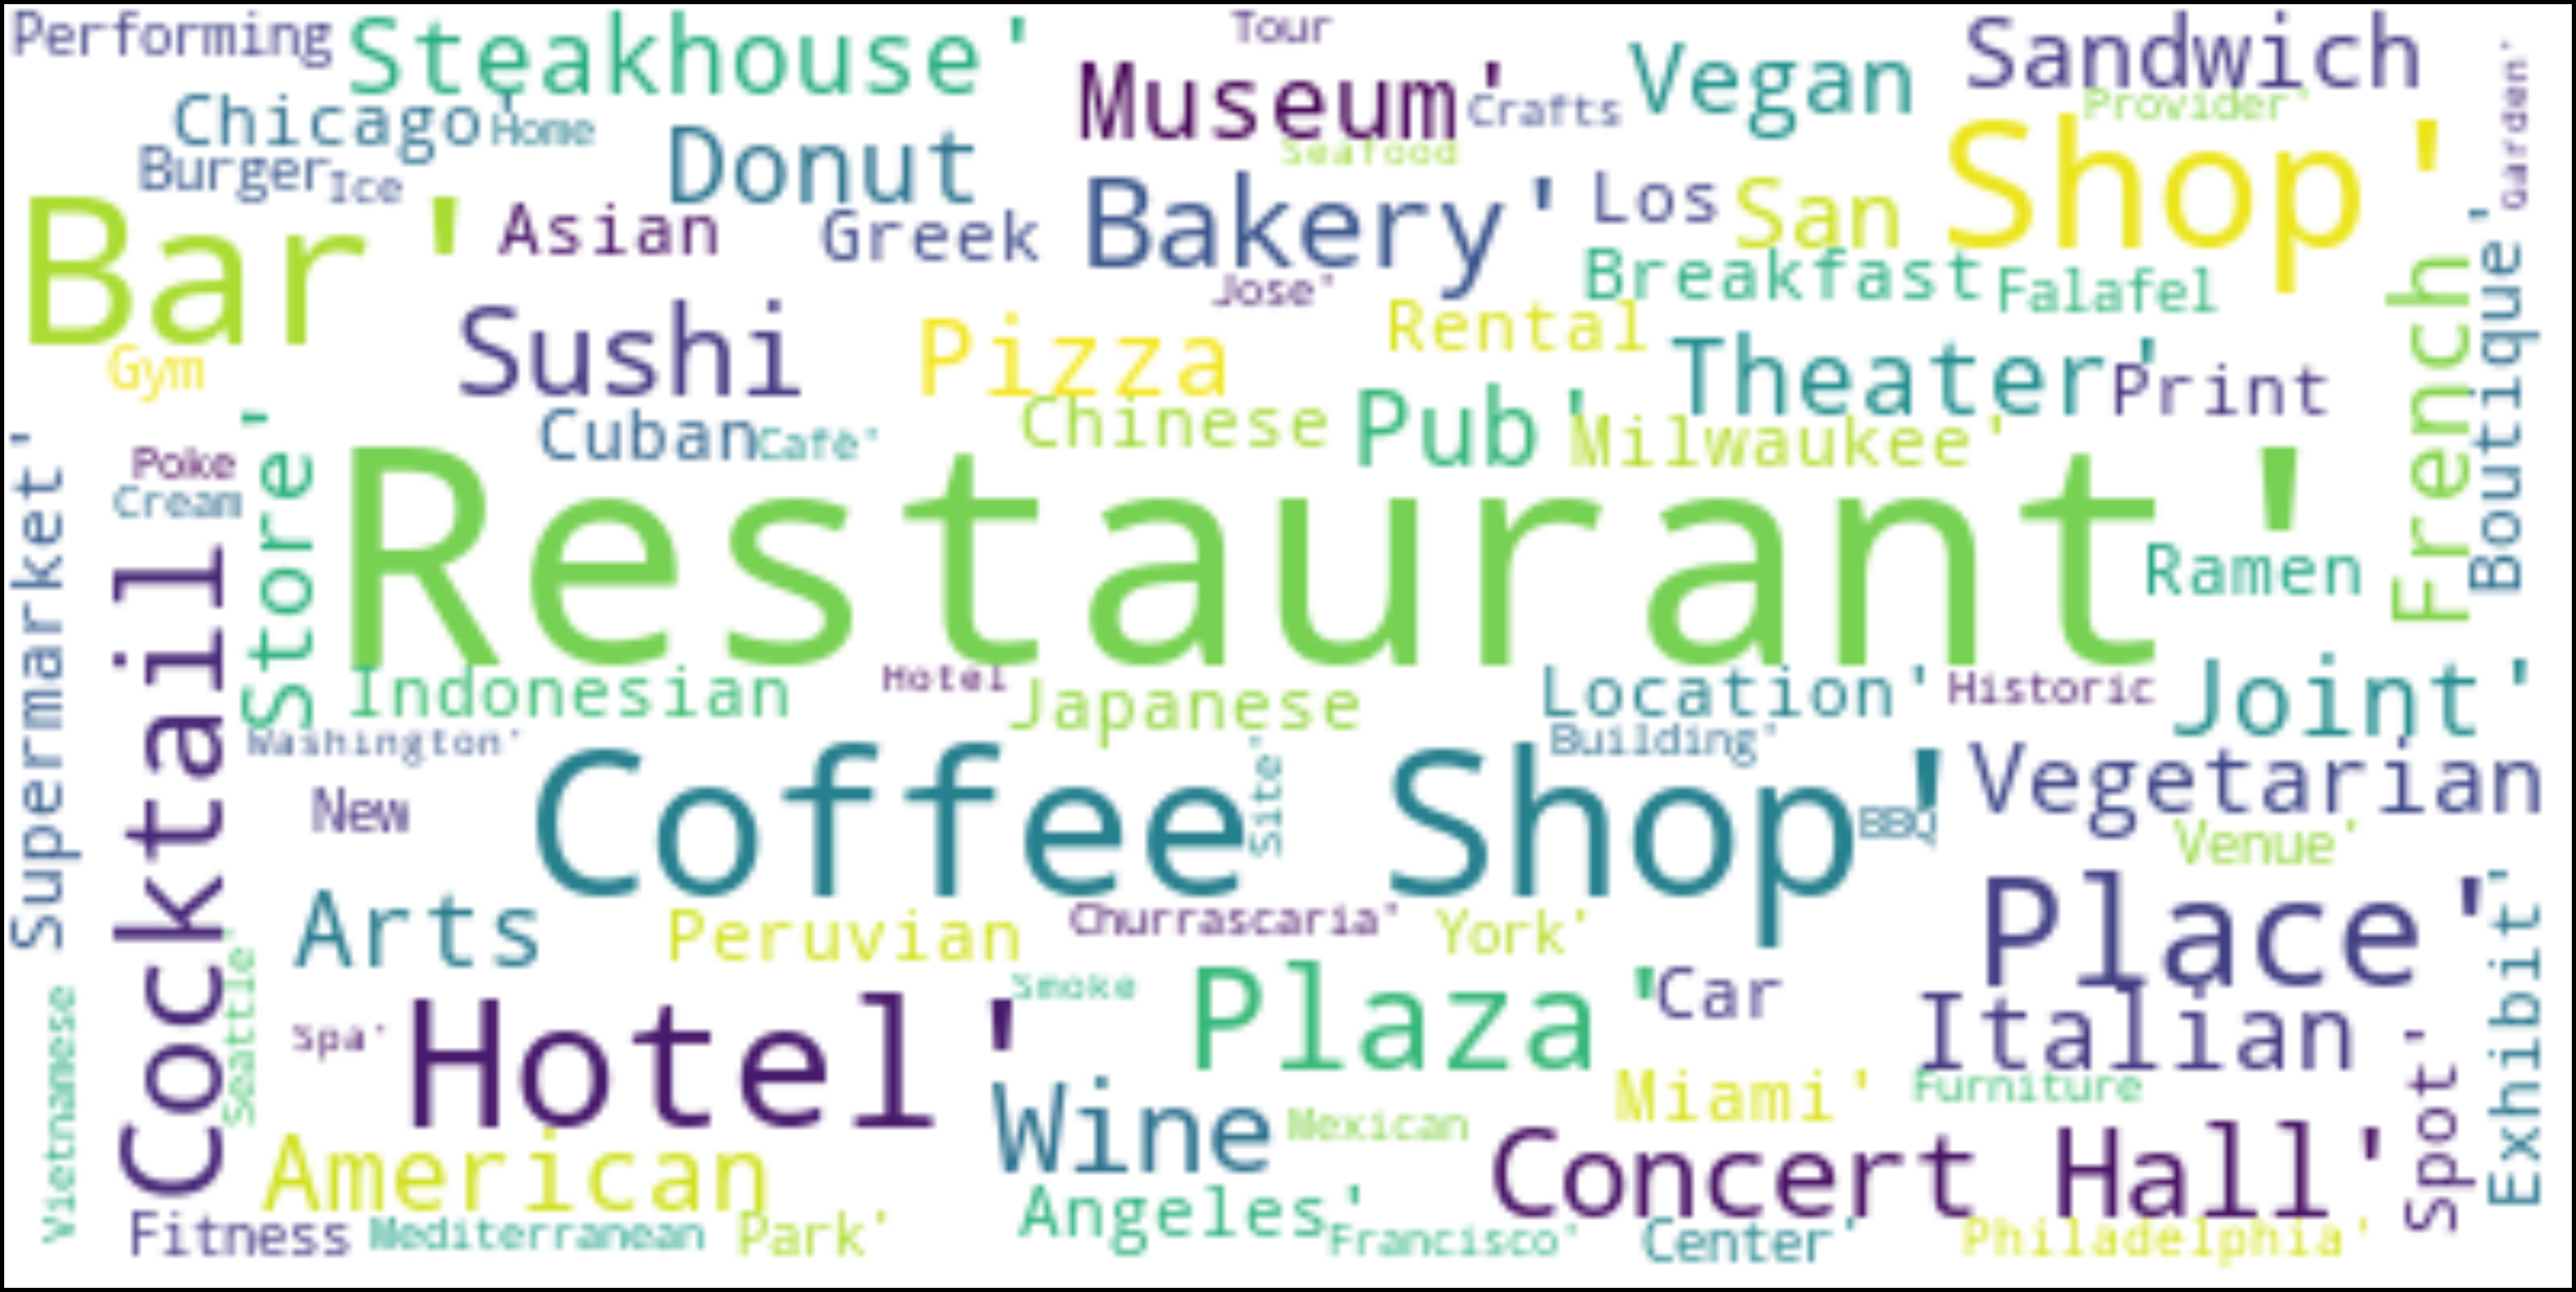

In [47]:
stopwords = set(STOPWORDS)

text = neighborhoods_venues_sorted.values

# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
wc.generate(str(text))

fig = plt.figure(
    figsize = (60, 60),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Filtering Asian restaurants

In [48]:
a_list = [ "Asian Restaurant",
"Chinese Restaurant",
"Dim Sum Restaurant",
"Dumpling Restaurant",
"Filipino Restaurant",
"Indonesian Restaurant",
"Japanese Curry Restaurant",
"Japanese Restaurant",
"Ramen Restaurant",
"Shanghai Restaurant",
"Sushi Restaurant",
"Taiwanese Restaurant",
"Thai Restaurant",
"Udon Restaurant",
"Vietnamese Restaurant",
"Yoshoku Restaurant",
"Noodle House"]

In [51]:
#Create dataframe to count the number of restaurants in each city 
#new_list= a_list.insert(0, 'City')      # uncomment when running program for the first time
#a_df= pd.DataFrame(columns= new_list)  #uncomment when running program for the first time
a_df= pd.DataFrame(columns= a_list)
#a_df

In [222]:
#creating dataframe
a_df = venues_onehot[a_list].groupby('City').sum().reset_index()
a_df['Total']= a_df. sum(axis=1) # add a total column to sum up restaurants in each city
a_df

City  Asian Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
0        Chicago                28                   0                   0   
1    Los Angeles                 0                   9                   4   
2          Miami                 4                  27                   0   
3      Milwaukee                 0                   0                   0   
4       New York                12                   0                   0   
5   Philadelphia                13                   4                   4   
6  San Francisco                 0                   0                   0   
7       San Jose                 4                   0                   0   
8        Seattle                 0                   6                   0   
9     Washington                 0                   0                   0   

   Dumpling Restaurant  Filipino Restaurant  Indonesian Restaurant  \
0                    0                    0                      0   
1                    0                    2                      0   
2                    0                    0                     27   
3                    0                    0                      0   
4                    0                    0                      0   
5                    0                    0                      0   
6                   16                    0                      0   
7                    0                    0                      0   
8                    1                    0                      0   
9                    0                    0                      0   

   Japanese Curry Restaurant  Japanese Restaurant  Ramen Restaurant  \
0                          0                    1                 0   
1                          0                   71                52   
2                          0                    2                 0   
3                          0                    0                 0   
4                          5                   16                 0   
5                          0                    0                 0   
6                          0                    0                24   
7                          0                    0                 0   
8                          0                    9                 0   
9                          0                    1                 0   

   Shanghai Restaurant  Sushi Restaurant  Taiwanese Restaurant  \
0                    0                26                     0   
1                    0               100                     0   
2                    0                 0                     0   
3                    0                 0                     0   
4                    0                14                     0   
5                    3                 1                     0   
6                    0                21                     0   
7                    0                35                     0   
8                    0                 9                     1   
9                    0                 0                     0   

   Thai Restaurant  Udon Restaurant  Vietnamese Restaurant  \
0                0                0                      0   
1                2               22                      0   
2                0                0                      0   
3                0                0                      2   
4                0                0                      0   
5                6                0                      3   
6                6                0                     29   
7                0                0                      0   
8                4                0                      0   
9                0                0                      0   

   Yoshoku Restaurant  Noodle House  Total  
0                   0             0     55  
1                  11             3    276  
2                   0             0     60  
3         

#  Analysis <a name="analysis"></a>

After creating a dataframe with asian restaurants in all the cities , we can start with the basic analysis.

In [224]:
print('Total number of asian restaurants in all cities is {}'.format(a_df['Total'].sum()))

Total number of asian restaurants in all cities is 658


## Visualizing total asian restaurants by city

In [402]:
a_df= a_df.sort_values('Total',ascending=False)
a_df

City  Asian Restaurant  Chinese Restaurant  Dim Sum Restaurant  \
1    Los Angeles                 0                   9                   4   
6  San Francisco                 0                   0                   0   
2          Miami                 4                  27                   0   
0        Chicago                28                   0                   0   
8        Seattle                 0                   6                   0   
4       New York                12                   0                   0   
7       San Jose                 4                   0                   0   
5   Philadelphia                13                   4                   4   

   Dumpling Restaurant  Filipino Restaurant  Indonesian Restaurant  \
1                    0                    2                      0   
6                   16                    0                      0   
2                    0                    0                     27   
0                    0                    0                      0   
8                    1                    0                      0   
4                    0                    0                      0   
7                    0                    0                      0   
5                    0                    0                      0   

   Japanese Curry Restaurant  Japanese Restaurant  Ramen Restaurant  \
1                          0                   71                52   
6                          0                    0                24   
2                          0                    2                 0   
0                          0                    1                 0   
8                          0                    9                 0   
4                          5                   16                 0   
7                          0                    0                 0   
5                          0                    0                 0   

   Shanghai Restaurant  Sushi Restaurant  Taiwanese Restaurant  \
1                    0               100                     0   
6                    0                21                     0   
2                    0                 0                     0   
0                    0                26                     0   
8                    0                 9                     1   
4                    0                14                     0   
7                    0                35                     0   
5                    3                 1                     0   

   Thai Restaurant  Udon Restaurant  Vietnamese Restaurant  \
1                2               22                      0   
6                6                0                     29   
2                0                0                      0   
0                0                0                      0   
8                4                0                      0   
4                0                0                      0   
7                0                0                      0   
5                6                0                      3   

   Yoshoku Restaurant  Noodle House  Total  
1                  11             3    276  
6                   0             0     96  
2                   0             0     60  
0                   0             0     55  
8                   0            18     48  
4                   0             0     47  
7                   0             0     39  
5                   0             0     34

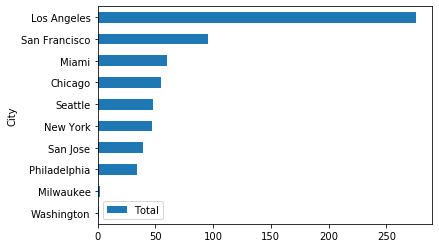

In [226]:
a_df.plot(kind='barh',x='City',y='Total')

Los Angeles has the much more restaurants than any other city , meanwhile Washington and Milwaukee have almost none in comparision.

### Dropping Milwaukee and Washington from the dataframe

In [229]:
a_df=a_df.drop(labels= [3,9], axis=0) #uncomment when running for the first time
a_df= a_df.sort_values('Total', ascending = False)

sbar=sns.barplot(x = 'City',
            y = 'Total',
            data = a_df)

for item in sbar.get_xticklabels():
    item.set_rotation(45)
    
sbar.set_title('Total Asian Restaurants')  

### Counting the category of restaurant in all cities

In [338]:
tp_count= a_df. sum(axis=0)
tp_count =tp_count.to_frame()
tp_count=tp_count.drop(labels=['City','Total'],axis=0)
tp_count=tp_count.sort_values(0,ascending=False).reset_index()
tp_count=tp_count.rename(columns={"index":"Category",0: "Count"})
tp_count

Category Count
0            Sushi Restaurant   206
1         Japanese Restaurant    99
2            Ramen Restaurant    76
3            Asian Restaurant    61
4          Chinese Restaurant    46
5       Vietnamese Restaurant    32
6       Indonesian Restaurant    27
7             Udon Restaurant    22
8                Noodle House    21
9             Thai Restaurant    18
10        Dumpling Restaurant    17
11         Yoshoku Restaurant    11
12         Dim Sum Restaurant     8
13  Japanese Curry Restaurant     5
14        Shanghai Restaurant     3
15        Filipino Restaurant     2
16       Taiwanese Restaurant     1

In [287]:
highest_count=tp_count.head(10)

Text(0.5, 1.0, 'Category of Restaurants')

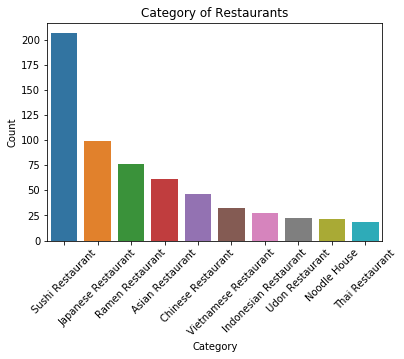

In [405]:
sbar=sns.barplot(x = 'Category',
            y = 'Count',
            data = highest_count)

for item in sbar.get_xticklabels():
    item.set_rotation(45)
    
sbar.set_title('Category of Restaurants')

### Visualizing number of sushi restaurants 

Text(0.5, 1.0, 'Sushi Restaurants')

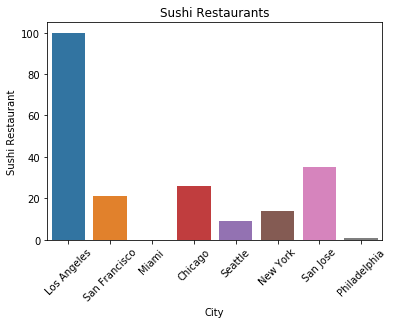

In [60]:
sbar=sns.barplot(x = 'City',
            y = 'Sushi Restaurant',
            data = a_df)

for item in sbar.get_xticklabels():
    item.set_rotation(45)
    
sbar.set_title('Sushi Restaurants') 

Sushi Restaurants are the most popular category of asian restaurants among all others. Most of the categories seem to come from Japanese cuisine. 
To Visualize which category comes from which cuisine, we can further group the above dataframe.
Categories that are names of a dish like noodle house will be in general category along with Asian Restaurant.

In [365]:
# creating list of cuisine type
values=pd.Series(['Japanese','Japanese','Japanese','General','Chinese','Vietnamese','Indonesian','Japanese','General','Thai','General','Japanese','General','Japanese','Chinese','Filipino','Taiwanese'])

#creating dataframe with cuisine type
df = pd.DataFrame(values,columns=['Cuisine'])
df =pd.concat([df,tp_count], axis=1)

df_c =df.groupby('Cuisine').count()
df_c =df_c .sort_values('Count',ascending=False)
df_c =df_c .drop('Count', axis=1).reset_index()
df_c 

Cuisine  Category
0    Japanese         6
1     General         4
2     Chinese         2
3    Filipino         1
4  Indonesian         1
5   Taiwanese         1
6        Thai         1
7  Vietnamese         1

### Total count of restaurants by cuisine type

In [381]:
df_g = df.groupby('Cuisine').sum()
df_g = df_g .drop('Category', axis=1)
df_g = df_g .sort_values('Count',ascending=False).reset_index()

df1 = df_g

# Calculate Percentage
df1['Percentage'] = (df1['Count'] / 
                      df1['Count'].sum()) * 100
#rounding values
df1['Percentage']=df1['Percentage'].round(decimals=2)

df1

Cuisine  Count  Percentage
0    Japanese    419       63.97
1     General    107       16.34
2     Chinese     49        7.48
3  Vietnamese     32        4.89
4  Indonesian     27        4.12
5        Thai     18        2.75
6    Filipino      2        0.31
7   Taiwanese      1        0.15

63.97% of the restaurants are of Japanese cuisine type whereas general category has 16.34% of the total asian restaurant.

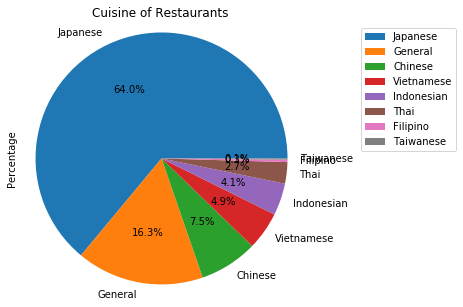

In [406]:
#Plotting a pie chart

mylabels=df1['Cuisine']
df1.plot.pie(y='Percentage',labels=mylabels, autopct='%1.1f%%', figsize=(5, 5))
plt.axis('equal')
plt.title('Cuisine of Restaurants')
plt.legend(bbox_to_anchor=(1.2, 1.0))
#plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.2, 1.0), fontsize=8) define patches
plt.show()

## Creating data frame of asian restaurant venues in LA

In [124]:
#Creating data frame for venues in la
condition= venues['City']=='Los Angeles' #filtering cities for la
nm=venues[condition]
nm.head()

la=nm.loc[nm['Venue Category'].isin(a_list)]   #filtering asian restaurants 
la.head()

City Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
32  Los Angeles     Badmaash              34.051342             -118.244571   
42  Los Angeles     Badmaash              34.051342             -118.244571   
44  Los Angeles     Badmaash              34.051342             -118.244571   
47  Los Angeles     Badmaash              34.051342             -118.244571   
50  Los Angeles     Badmaash              34.051342             -118.244571   

                  Venue  Venue Latitude  Venue Longitude       Venue Category  
32          Rice & Nori       34.050060      -118.242344  Japanese Restaurant  
42          Sticky Rice       34.050693      -118.248789      Thai Restaurant  
44       Marugame Monzo       34.049807      -118.240202      Udon Restaurant  
47   Sari Sari Store LA       34.051065      -118.249390  Filipino Restaurant  
50  Izakaya & Bar Fu-ga       34.050318      -118.241132  Japanese Restaurant

In [234]:
print('Total number of asian restaurants in Los Angelees are {}'.format(la.shape[0]))

Total number of asian restaurants in Los Angelees are 276


In [231]:
print('List of neighborhoods in LA having the asiatique restaurants')
neighborhood=la['Neighborhood'].unique()
neighborhood

List of neighborhoods in LA having the asiatique restaurants


array(['Badmaash', 'Redbird', 'Kinokuniya Bookstore', 'JiST Cafe',
       'Fugetsu-Do Sweet Shop', 'Marukai Market',
       'LA Plaza de Cultura y Artes', 'Birds & Bees', 'Blue Whale Bar',
       "Mike's Deli", 'Marugame Monzo', 'Izakaya & Bar Fu-ga',
       'Daikokuya', 'Rice & Nori', 'Mitsuru Sushi and Grill',
       'Chinese American Museum', 'Tuesday Night Cafe',
       'East West Players', 'Weller Court', 'Midori Matcha',
       'My Ramen Bar', 'Orochon Ramen', 'Starbucks', 'BOWLS LA',
       'Quiznos', 'Go for Broke Monument', 'Fire House #1', 'Pico House'],
      dtype=object)

# Clustering the restaurants together based on neighborhood

In [187]:
# function to convert string values in dataframe to float
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
   # data['City'] = number.fit_transform(data.City)
    data['Neighborhood'] = number.fit_transform(data.Neighborhood)
   # data['Venue'] = number.fit_transform(data.Venue)
    #data['Venue_Category'] = number.fit_transform(data.Venue_Category)
    
    
    data=data.fillna(-999)
    return data

In [188]:
la_r=la[['Neighborhood']]
train =convert(la_r)

C:\Users\PSharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
# set number of clusters
kclusters = 28 # total number of neighborhoods in our dataframe

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(train)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:28] 

array([24, 24, 24, 24, 24, 12, 12, 12, 12, 12, 12, 12, 12,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10])

In [256]:
clustered_la=la

# add clustering labels
#clustered_la.insert(0, 'Cluster Labels', kmeans.labels_) #uncomment when running the program for the first time

#clustered_la # check the last columns!

In [183]:
#clustered_la =clustered_la.drop('Cluster Labels',1)
#la =la.drop('Cluster Labels',1)

### Examine first five cluster

### Cluster 0

In [258]:
clustered_la.loc[clustered_la['Cluster Labels'] == 0,clustered_la.columns[[2]+[0] + list(range(5, clustered_la.shape[1]))]]

Neighborhood  Cluster Labels                               Venue  \
709     BOWLS LA               0                      Marugame Monzo   
714     BOWLS LA               0                          Hama Sushi   
719     BOWLS LA               0                           Daikokuya   
725     BOWLS LA               0                              Komasa   
727     BOWLS LA               0            Kura Revolving Sushi Bar   
728     BOWLS LA               0                 Zencu Sushi & Grill   
729     BOWLS LA               0                        Mitsuru Cafe   
730     BOWLS LA               0                       Shin-Sen-Gumi   
733     BOWLS LA               0                        Rakkan Ramen   
736     BOWLS LA               0  Chinchikurin Hiroshima Okonomiyaki   
737     BOWLS LA               0                              Oomasa   
738     BOWLS LA               0                          Sushi Enya   

     Venue Latitude  Venue Longitude       Venue Category  
709       34.049807      -118.240202      Udon Restaurant  
714       34.048527      -118.240500     Sushi Restaurant  
719       34.049914      -118.240095     Ramen Restaurant  
725       34.048499      -118.240424  Japanese Restaurant  
727       34.048684      -118.240673     Sushi Restaurant  
728       34.049178      -118.240654     Sushi Restaurant  
729       34.048959      -118.240001  Japanese Restaurant  
730       34.048187      -118.239152     Ramen Restaurant  
733       34.049447      -118.239528     Ramen Restaurant  
736       34.049464      -118.239715  Japanese Restaurant  
737       34.049294      -118.239678     Sushi Restaurant  
738       34.049700      -118.239743     Sushi Restaurant

### Cluster 1 

In [238]:
clustered_la.loc[clustered_la['Cluster Labels'] == 1, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                               Venue  \
442  Mitsuru Sushi and Grill                      Marugame Monzo   
447  Mitsuru Sushi and Grill                          Hama Sushi   
452  Mitsuru Sushi and Grill                           Daikokuya   
459  Mitsuru Sushi and Grill                              Komasa   
460  Mitsuru Sushi and Grill                       Shin-Sen-Gumi   
461  Mitsuru Sushi and Grill            Kura Revolving Sushi Bar   
462  Mitsuru Sushi and Grill                 Zencu Sushi & Grill   
463  Mitsuru Sushi and Grill                        Mitsuru Cafe   
467  Mitsuru Sushi and Grill                        Rakkan Ramen   
471  Mitsuru Sushi and Grill  Chinchikurin Hiroshima Okonomiyaki   

     Venue Latitude  Venue Longitude       Venue Category  
442       34.049807      -118.240202      Udon Restaurant  
447       34.048527      -118.240500     Sushi Restaurant  
452       34.049914      -118.240095     Ramen Restaurant  
459       34.048499      -118.240424  Japanese Restaurant  
460       34.048187      -118.239152     Ramen Restaurant  
461       34.048684      -118.240673     Sushi Restaurant  
462       34.049178      -118.240654     Sushi Restaurant  
463       34.048959      -118.240001  Japanese Restaurant  
467       34.049447      -118.239528     Ramen Restaurant  
471       34.049464      -118.239715  Japanese Restaurant

### Cluster 2

In [239]:
clustered_la.loc[clustered_la['Cluster Labels'] == 2, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                               Venue  \
769  Go for Broke Monument                      Marugame Monzo   
773  Go for Broke Monument                           Daikokuya   
776  Go for Broke Monument                        Rakkan Ramen   
779  Go for Broke Monument  Chinchikurin Hiroshima Okonomiyaki   
780  Go for Broke Monument                          Sushi Enya   
781  Go for Broke Monument             Mitsuru Sushi and Grill   
782  Go for Broke Monument                              Oomasa   
784  Go for Broke Monument                        Suehiro Cafe   
785  Go for Broke Monument                       Izakaya Gazen   
786  Go for Broke Monument                 Izakaya & Bar Fu-ga   
787  Go for Broke Monument                        Mitsuru Cafe   
789  Go for Broke Monument                 Zencu Sushi & Grill   
790  Go for Broke Monument                          Hama Sushi   
791  Go for Broke Monument                       Shin-Sen-Gumi   
793  Go for Broke Monument                        My Ramen Bar   

     Venue Latitude  Venue Longitude       Venue Category  
769       34.049807      -118.240202      Udon Restaurant  
773       34.049914      -118.240095     Ramen Restaurant  
776       34.049447      -118.239528     Ramen Restaurant  
779       34.049464      -118.239715  Japanese Restaurant  
780       34.049700      -118.239743     Sushi Restaurant  
781       34.050066      -118.240620     Sushi Restaurant  
782       34.049294      -118.239678     Sushi Restaurant  
784       34.049717      -118.239989   Yoshoku Restaurant  
785       34.049197      -118.239301  Japanese Restaurant  
786       34.050318      -118.241132  Japanese Restaurant  
787       34.048959      -118.240001  Japanese Restaurant  
789       34.049178      -118.240654     Sushi Restaurant  
790       34.048527      -118.240500     Sushi Restaurant  
791       34.048187      -118.239152     Ramen Restaurant  
793       34.049993      -118.240341         Noodle House

### Cluster 3

In [194]:
clustered_la.loc[clustered_la['Cluster Labels'] == 3, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                               Venue  Venue Latitude  \
679    Starbucks                      Marugame Monzo       34.049807   
684    Starbucks                          Hama Sushi       34.048527   
688    Starbucks                           Daikokuya       34.049914   
693    Starbucks                              Komasa       34.048499   
694    Starbucks            Kura Revolving Sushi Bar       34.048684   
696    Starbucks                 Zencu Sushi & Grill       34.049178   
698    Starbucks                        Mitsuru Cafe       34.048959   
704    Starbucks                        Rakkan Ramen       34.049447   
705    Starbucks  Chinchikurin Hiroshima Okonomiyaki       34.049464   
706    Starbucks                          Sushi Enya       34.049700   
707    Starbucks                              Oomasa       34.049294   
708    Starbucks                       Shin-Sen-Gumi       34.048187   

     Venue Longitude       Venue Category  
679      -118.240202      Udon Restaurant  
684      -118.240500     Sushi Restaurant  
688      -118.240095     Ramen Restaurant  
693      -118.240424  Japanese Restaurant  
694      -118.240673     Sushi Restaurant  
696      -118.240654     Sushi Restaurant  
698      -118.240001  Japanese Restaurant  
704      -118.239528     Ramen Restaurant  
705      -118.239715  Japanese Restaurant  
706      -118.239743     Sushi Restaurant  
707      -118.239678     Sushi Restaurant  
708      -118.239152     Ramen Restaurant

### Cluster 4

In [195]:
clustered_la.loc[clustered_la['Cluster Labels'] == 4, clustered_la.columns[[2] + list(range(5, clustered_la.shape[1]))]]

Neighborhood                               Venue  Venue Latitude  \
322  Marugame Monzo                      Marugame Monzo       34.049807   
328  Marugame Monzo                          Hama Sushi       34.048527   
329  Marugame Monzo                       Shin-Sen-Gumi       34.048187   
334  Marugame Monzo                           Daikokuya       34.049914   
343  Marugame Monzo                              Komasa       34.048499   
344  Marugame Monzo            Kura Revolving Sushi Bar       34.048684   
345  Marugame Monzo                 Zencu Sushi & Grill       34.049178   
346  Marugame Monzo                        Mitsuru Cafe       34.048959   
349  Marugame Monzo                        Rakkan Ramen       34.049447   
351  Marugame Monzo  Chinchikurin Hiroshima Okonomiyaki       34.049464   

     Venue Longitude       Venue Category  
322      -118.240202      Udon Restaurant  
328      -118.240500     Sushi Restaurant  
329      -118.239152     Ramen Restaurant  
334      -118.240095     Ramen Restaurant  
343      -118.240424  Japanese Restaurant  
344      -118.240673     Sushi Restaurant  
345      -118.240654     Sushi Restaurant  
346      -118.240001  Japanese Restaurant  
349      -118.239528     Ramen Restaurant  
351      -118.239715  Japanese Restaurant

### checking cluster labels and respective neighbourhood

In [283]:
# creating list of neighborhoods according to clustered 
from scipy import stats

label_c=clustered_la[['Cluster Labels','Neighborhood']].groupby('Cluster Labels').agg(pd.Series.mode)#.reset_index()#.to_frame()
label_list= label_c['Neighborhood']
label_list

Cluster Labels
0                        BOWLS LA
1         Mitsuru Sushi and Grill
2           Go for Broke Monument
3                       Starbucks
4                  Marugame Monzo
5               East West Players
6                  Blue Whale Bar
7                      Pico House
8            Kinokuniya Bookstore
9              Tuesday Night Cafe
10                      JiST Cafe
11                  Midori Matcha
12                        Redbird
13                    Mike's Deli
14                  Orochon Ramen
15                   Weller Court
16                    Rice & Nori
17                 Marukai Market
18            Izakaya & Bar Fu-ga
19          Fugetsu-Do Sweet Shop
20                      Daikokuya
21                   My Ramen Bar
22                  Fire House #1
23                        Quiznos
24                       Badmaash
25        Chinese American Museum
26    LA Plaza de Cultura y Artes
27                   Birds & Bees
Name: Neighborhood, dtype: object

# Visualizing restaurants with cluster labels on a map

In [240]:
add='Los Angeles'

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(add)
latitude = location.latitude
longitude = location.longitude

print (location,latitude,longitude)

Los Angeles, California, United States 34.0536909 -118.242766


In [286]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start= 15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered_la['Venue Latitude'], clustered_la['Venue Longitude'], clustered_la['Venue'], clustered_la['Cluster Labels']):
    #label = folium.Popup(str(poi) + ' ,' + str(label_list[cluster]), parse_html=True)
    label = folium.Popup(str(poi), parse_html=True)
    
    #converting nan and float cluster values to integers for indexing 
    c_1=cluster-1
    if math.isnan(c_1) :
            c_1= 0     #assinging mode value to nan
    else:
        c_1= round(c_1)-1
        
   # print (c_1)
     
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[c_1],
        fill=True,
        fill_color=rainbow[c_1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [285]:
from folium import plugins

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(map_clusters)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered_la['Venue Latitude'], clustered_la['Venue Longitude'], clustered_la['Neighborhood'], clustered_la['Cluster Labels']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(incidents)

    
map_clusters

# Results and Discussion <a name="results"></a>

From the 8571 venues obtained from the Foursquare API for the most densely populated cities of America, most belonged to the category of restaurants. The other categories in the list were that of other eating and drinking outlets like coffee shops, bars, etc. as well as hotels, museums and others.

From among these venues, 658 venues were in the category of 'Asian Restaurants'. And within these **Sushi** Restaurants were the most popular type of Asian cuisine.

Most of these Restaurants were in **Los Angeles** where they had 276 Asian Restaurants of which 100 were sushi bistros and others were ramen restaurants and Japanese restaurant. All three categories belong to Japanese cuisine. The second place that had the most Asian restaurants was San Francisco with 96 restaurants and the cuisine being preferred were Vietnamese, ramen and sushi.

**Japanese** cuisine seemed popular more than others overall with sushi being the most popular choice. Other categories included in the Japanese cuisine were ramen, Udon, Yoshuku, Japanese curry and an Japanese restaurant. There were also restaurants labelled as Asian Restaurants too with no particular country specific cuisine.
64 % of the 658 restaurants found in these cities belonged to Japanese cuisine,<br>
16.3% belonged to general asian category<br>
7.5% Chinese,<br>
4.9% Vietnamese,<br>
4.1% Indonesian and<br>
3.2% others.<br>
Focusing on Los Angeles where most of our venues were, 28 unique Neighborhoods were found where the 276 restaurants were. Upon Plotting them on the map they were found to be pretty close to each other and were mostly centered around '**Little Tokyo**' and '**New Chinatown**'.


## Conclusion <a name="conclusion"></a>

It would be the most beneficial to import fresh raw material food to the west coast of USA, especially to Los Angeles where the presence of sushi restaurants is the highest. Other Japanese cuisines are also preferred in the area that might have the same ingredient list in their cuisine like in ramen, udon,etc. 